In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import *

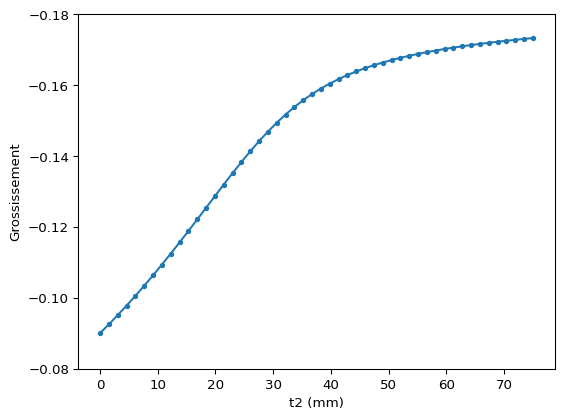

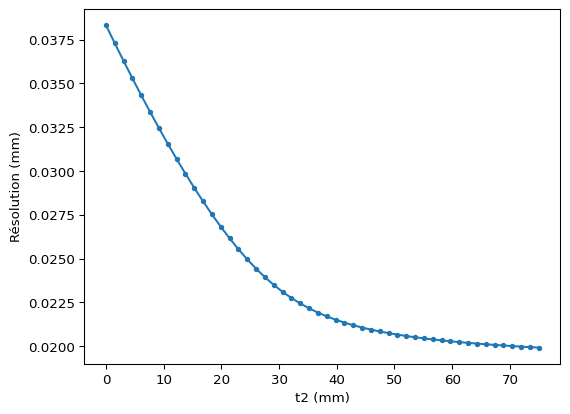

In [29]:

f3 = sp.symbols('f3')
L2 = sp.symbols('L2')
t2 = sp.symbols('t2')
t3 = sp.symbols('t3')
f2 = sp.symbols('f2')
f1 = sp.symbols('f1')

# I define a function for the translation matrix
def Mt(d):
    '''
        Translation ray transfer matrix
    '''
    M = np.array([[1, d],
                  [0, 1]])
    return M

# I define a function for the thin lens matrix
def Ml(f):
    '''
        Thin lens ray transfer matrix
    '''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

# I create a function for the total system matrix M
def M_system(t2, t3, L):
    '''
        Computes the total system transfer matrix
    '''
    M = Mt(d=L-t3-t2)@Ml(f=75)@Mt(d=t3)@Ml(f=-75)@Mt(d=t2)@Ml(f=150)@Mt(d=1000)
    return M


#x = sp.symbols('x') # symbolize x
t2range = np.linspace(0, 75) # range of values for s
t3_solutions = [] # empty array for solutions
A_sol = []
res_sol = []
# for L in range(100,201):
#     Mtot = M_system(50, t3, L) # compute the system's matrix
#     B = Mtot[0, 1] # get B(x) from system's matrix
#     t3_sol = sp.solve(B) # Solve B(x) = 0 Carefull, there may be many solutions...
#     t3_sol_test = t3_sol[0]
#     if t3_sol_test.is_real:
#         print(L)
#     else:
#         continue

L=180
taille_pixel = 0.00345 # (mm)
# # Iteratively solve the problem
for t2 in t2range:
    Mtot = M_system(t2, t3, L) # compute the system's matrix
    B = Mtot[0, 1] # get B(x) from system's matrix
    t3_sol = sp.solve(B) # Solve B(x) = 0 Carefull, there may be many solutions...
    t3_solutions.append(sp.solve(B)) # add solution to list
    A = M_system(t2, t3_sol[1], L)[0, 0]
    A_sol.append(A)
    res_sol.append(np.abs(taille_pixel/A))

# plot results
plt.figure(dpi=96)
plt.plot(t2range, A_sol, '.-')
plt.xlabel(r't_2:/(mm)')
plt.ylim(-0.08, -0.180)
plt.ylabel('Grossissement')
plt.savefig('t2vsA.png')

plt.figure(dpi=96)
plt.plot(t2range, res_sol, '.-')
plt.xlabel(r':/(mm)')
plt.ylabel('Résolution (mm)')
plt.savefig('t2vsRes.png')